In [2]:
from PIL import Image  
import numpy as np  
import matplotlib.pyplot as plt 

def count_parts(image_path):  
    # 定义部件与灰度值的映射  
    part_mapping = {  
        0: 'background',  
        1: 'panel',  
        2: 'antenna',  
        3: 'instrument',  
        4: 'thruster',  
        5: 'opticpayload'  
    }  

    # 打开灰度图像  
    image = Image.open(image_path).convert('L')  # 确保图像为灰度模式  
    image_array = np.array(image)  

    # 初始化计数字典  
    part_counts = {part: 0 for part in part_mapping.values()}  

    # 统计每个部件的像素个数  
    for gray_value, part in part_mapping.items():  
        part_counts[part] = np.sum(image_array == gray_value)  

    return part_counts  

In [2]:
count_parts('/Volumes/My Passport/dataset/UESD/train-1/00011.png')

{'background': np.int64(940152),
 'panel': np.int64(9270),
 'antenna': np.int64(0),
 'instrument': np.int64(2971),
 'thruster': np.int64(0),
 'opticpayload': np.int64(0)}

In [3]:
# 定义每个类别的 RGB 颜色  
color_mapping = {  
    0: (0, 0, 0),         # background: 黑色  
    1: (255, 0, 0),       # panel: 红色  
    2: (0, 255, 0),       # antenna: 绿色  
    3: (0, 0, 255),       # instrument: 蓝色  
    4: (255, 255, 0),     # thruster: 黄色  
    5: (255, 165, 0)      # opticpayload: 橙色  
}  

def convert_to_rgb(grayscale_image_path):  
    # 读取灰度图像并转换为 Array  
    image = Image.open(grayscale_image_path).convert('L')  # 确保图像为灰度模式  
    image_array = np.array(image)  

    # 创建 RGB 图像  
    height, width = image_array.shape  
    rgb_image = np.zeros((height, width, 3), dtype=np.uint8)  

    # 根据每个像素的灰度值填充相应的 RGB 颜色  
    for gray_value, color in color_mapping.items():  
        rgb_image[image_array == gray_value] = color  

    return rgb_image  

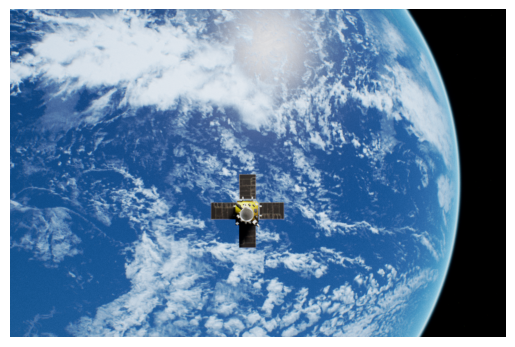

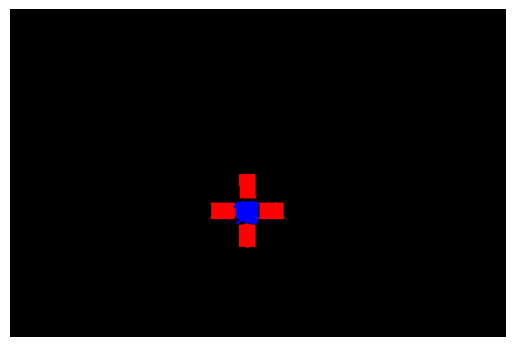

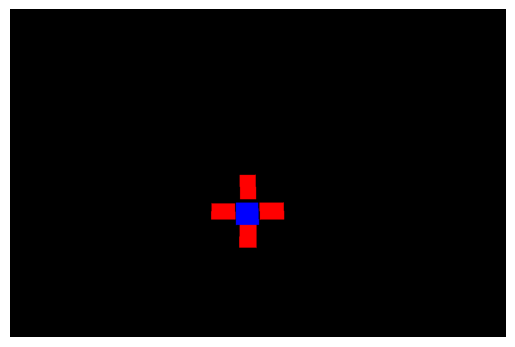

In [5]:
image_ori = Image.open('/Volumes/My Passport/dataset/UESD/test/images/00011.png')
image_lab = convert_to_rgb('/Volumes/My Passport/dataset/UESD/test/g_labels/00011.png')
image_lab_truth = convert_to_rgb('/Volumes/My Passport/dataset/UESD/test/truth_labels/00011.png')
images = [image_ori, image_lab,image_lab_truth]
for image in images: 
    plt.imshow(image) 
    plt.axis('off')
    plt.show()  

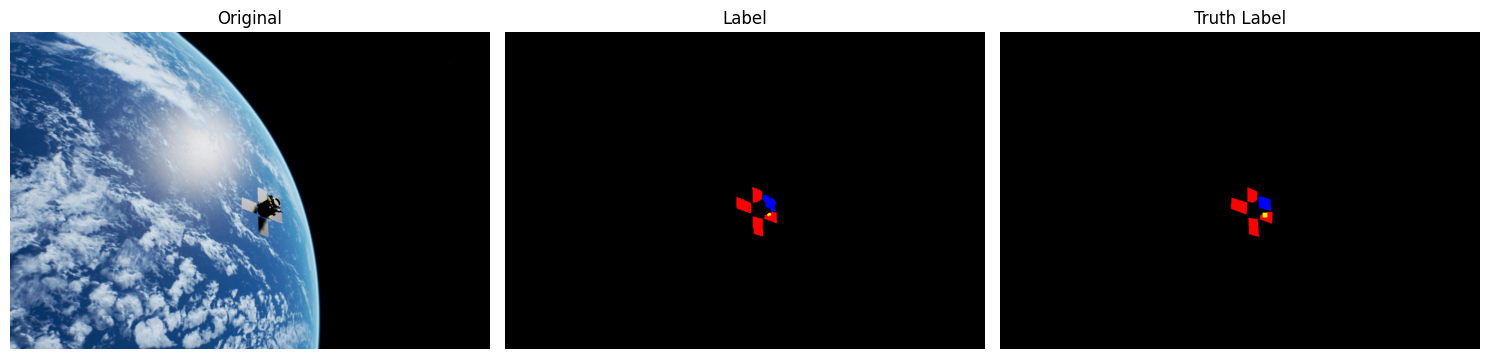

In [4]:
image_ori = Image.open('/Volumes/My Passport/dataset/UESD/test/images/00013.png')  
image_lab = convert_to_rgb('/Volumes/My Passport/dataset/UESD/test/g_labels/00013.png')  
image_lab_truth = convert_to_rgb('/Volumes/My Passport/dataset/UESD/test/truth_labels/00013.png')  
images = [image_ori, image_lab, image_lab_truth]  
titles = ['Original', 'Label', 'Truth Label']  # 可选，加标题  

# 创建1行3列的子图  
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  
for ax, img, title in zip(axes, images, titles):  
    ax.imshow(img)  
    ax.set_title(title)  
    ax.axis('off')  
plt.tight_layout()  
plt.show()  